In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.python.eager.context import graph_mode

In [2]:
# down and load data from mnist(số )
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# chia model veef dangj tuwf 0 --> 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# xây dụng model 
model = tf.keras.models.Sequential()
#chuyển dữ liệu về dạng phẳng 28x28 = 1x748
model.add(tf.keras.layers.Flatten())
#tạo ra 2 lớp của model với 128 điểm  
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
#tạo lớp cuối vói 10 điểm 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [ ]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2688 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - accuracy: 0.9665
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9777


In [ ]:
#loss function and accuracy function
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9653
0.11247846484184265
0.9653000235557556


In [ ]:
# lưu model và save model
model.save('epic_num_reader.model')
new_model = tf.keras.models.load_model('epic_num_reader.model')
predictions = new_model.predict(x_test)

INFO:tensorflow:Assets written to: epic_num_reader.model/assets


1


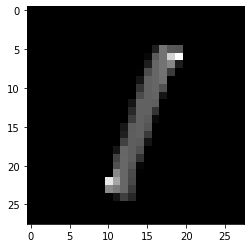

In [ ]:
# in kết quả và thử
print(np.argmax(predictions[5]))
plt.imshow(x_test[5],cmap='gray')
plt.show()